# 1. Import Libary 

In [1]:
import pandas as pd
import pyodbc
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Import Data Frame From SQL SERVER

In [10]:
conn = pyodbc.connect( #CONNECTION
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-OQLFA92\\SQLEXPRESS;"
    "DATABASE=vti_dataset;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;")

df_tree = pd.read_sql_query(
'''                                        
SELECT *
FROM  [vti_dataset].[dbo].[bank];                         
''', conn)
df_tree


C:\Users\Admin-s\AppData\Local\Temp\ipykernel_14048\3823520648.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tree = pd.read_sql_query(


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,False,2343,True,False,unknown,5,may,1042,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,False,45,False,False,unknown,5,may,1467,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,False,1270,True,False,unknown,5,may,1389,1,-1.0,0,unknown,yes
3,55,services,married,secondary,False,2476,True,False,unknown,5,may,579,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,False,184,False,False,unknown,5,may,673,2,-1.0,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,False,1,True,False,cellular,20,apr,257,1,-1.0,0,unknown,no
11158,39,services,married,secondary,False,733,False,False,unknown,16,jun,83,4,-1.0,0,unknown,no
11159,32,technician,single,secondary,False,29,False,False,cellular,19,aug,156,2,-1.0,0,unknown,no
11160,43,technician,married,secondary,False,0,False,True,cellular,8,may,9,2,NaN,5,failure,no


In [13]:
df_tree = df_tree.drop_duplicates()
df_tree

,job,marital,education,default,housing,loan,deposit
0,admin.,married,secondary,False,True,False,yes
1,admin.,married,secondary,False,False,False,yes
2,technician,married,secondary,False,True,False,yes
3,services,married,secondary,False,True,False,yes
4,admin.,married,tertiary,False,False,False,yes
...,...,...,...,...,...,...,...
11023,self-employed,married,secondary,True,True,False,no
11036,housemaid,divorced,tertiary,False,False,True,no
11118,unemployed,single,secondary,False,True,True,no
11126,unemployed,married,secondary,True,True,True,no


# 3. CLEARNING DATA PROCESS

## 3.1 Remove Duplicate Rows

## 3.2 Detect & Remove Outliers Using IQR

In [ ]:
#Since our feature are categories, we don't have outlier

## 3.3 Remove Irrelevant Data Using Biz Sense

In [16]:
df_tree = df_tree[['job','marital','education','default','housing','loan','deposit']]
df_tree

,job,marital,education,default,housing,loan,deposit
0,admin.,married,secondary,False,True,False,yes
1,admin.,married,secondary,False,False,False,yes
2,technician,married,secondary,False,True,False,yes
3,services,married,secondary,False,True,False,yes
4,admin.,married,tertiary,False,False,False,yes
...,...,...,...,...,...,...,...
11023,self-employed,married,secondary,True,True,False,no
11036,housemaid,divorced,tertiary,False,False,True,no
11118,unemployed,single,secondary,False,True,True,no
11126,unemployed,married,secondary,True,True,True,no


## 3.4 Standardization Capitalization

## 3.5 Covert Data Type

## 3.6 Clear Format

## 3.7 Fix Error

## 3.9 Languages Transaltion

## 3.10 Handle Missing Value

# 4. Feature Engineering 

In [ ]:
#Since we focus on demographic only, we don;t need more features add-in

# 5. DECISION TREE / CALCULATE ENTROPY EACH FEATURE


In [14]:
# 2. Prepare Data: Separate features (X) and target (y)
X = df_tree.drop('deposit', axis=1)
y = df_tree['deposit']
X, y

(                 job   marital  education  default  housing   loan
 0             admin.   married  secondary    False     True  False
 1             admin.   married  secondary    False    False  False
 2         technician   married  secondary    False     True  False
 3           services   married  secondary    False     True  False
 4             admin.   married   tertiary    False    False  False
 ...              ...       ...        ...      ...      ...    ...
 11023  self-employed   married  secondary     True     True  False
 11036      housemaid  divorced   tertiary    False    False   True
 11118     unemployed    single  secondary    False     True   True
 11126     unemployed   married  secondary     True     True   True
 11143     unemployed  divorced  secondary    False     True   True
 
 [786 rows x 6 columns],
 0        yes
 1        yes
 2        yes
 3        yes
 4        yes
         ... 
 11023     no
 11036     no
 11118     no
 11126     no
 11143     no
 Na

In [17]:
# 3. Handle Categorical Features using one-hot encoding (get_dummies)
# This converts categorical text into numerical columns (e.g., 'job_admin.' becomes 0 or 1)
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False
3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
11036,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
11118,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
11126,True,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False


In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 4. Initialize and Train the Decision Tree Classifier
# We specifically use 'entropy' criterion as requested to calculate information gain
# We use max_depth=3 for a clear, readable visualization

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf.fit(X_encoded, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


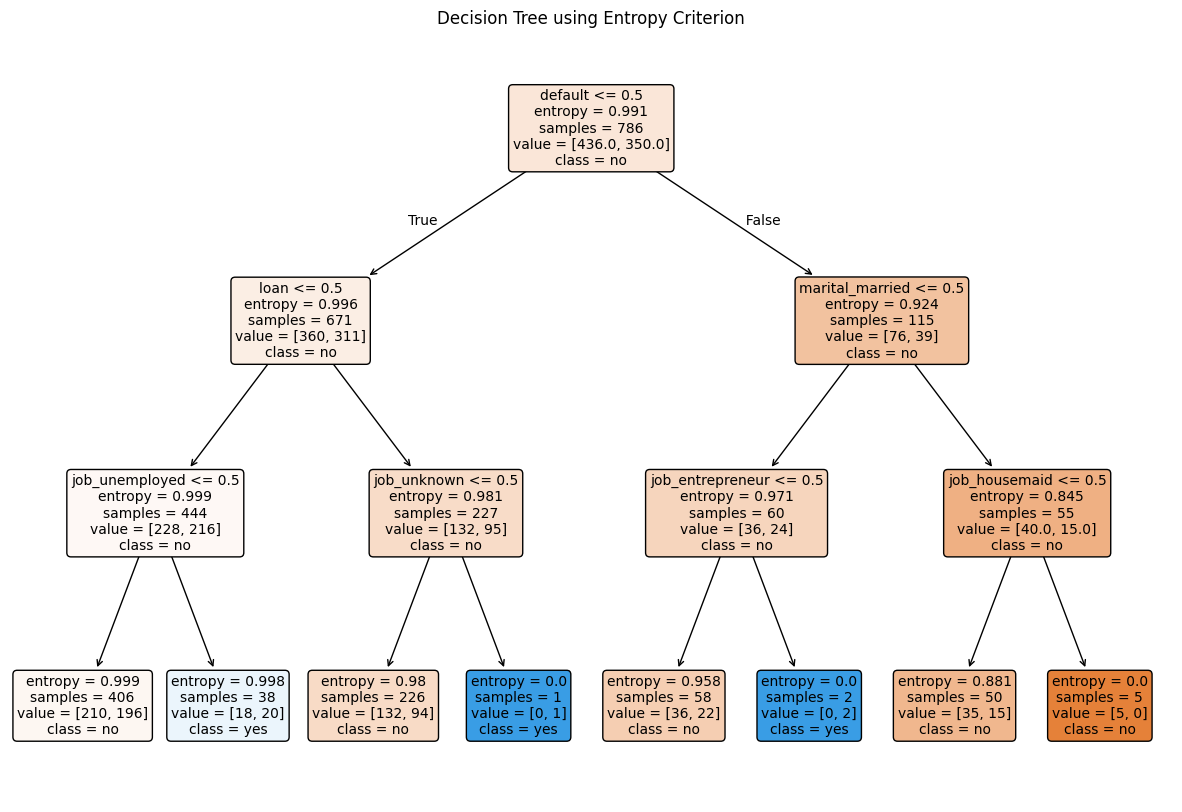

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=X_encoded.columns.tolist(),
          class_names=['no', 'yes'], # Assuming 'no' is class 0 and 'yes' is class 1
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree using Entropy Criterion")
plt.show()

In [ ]:
# 5. Generate predictions for the entire dataset used for training
# These predictions are the "label tree" results
df_tree['tree_prediction'] = clf.predict(X_encoded)

df_tree

,job,marital,education,default,housing,loan,deposit,tree_prediction
0,admin.,married,secondary,False,True,False,yes,no
1,admin.,married,secondary,False,False,False,yes,no
2,technician,married,secondary,False,True,False,yes,no
3,services,married,secondary,False,True,False,yes,no
4,admin.,married,tertiary,False,False,False,yes,no
...,...,...,...,...,...,...,...,...
11023,self-employed,married,secondary,True,True,False,no,no
11036,housemaid,divorced,tertiary,False,False,True,no,no
11118,unemployed,single,secondary,False,True,True,no,no
11126,unemployed,married,secondary,True,True,True,no,no


# 6. Save Clear Data Into Database To Visiualization ti

In [23]:
import pyodbc

# --- Connect ---
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-OQLFA92\\SQLEXPRESS;"
    "DATABASE=vti_dataset;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)
cursor = conn.cursor()

# --- Map pandas dtype -> SQL Server type ---
dtype_map = lambda dt: "INT" if pd.api.types.is_integer_dtype(dt) else \
                       "FLOAT" if pd.api.types.is_float_dtype(dt) else \
                       "BIT" if pd.api.types.is_bool_dtype(dt) else \
                       "DATETIME" if pd.api.types.is_datetime64_any_dtype(dt) else \
                       "VARCHAR(255)"

table_name = "use_case_4_Decision_Tree" #

# --- Drop + Create table ---
cursor.execute(f"IF OBJECT_ID('dbo.{table_name}', 'U') IS NOT NULL DROP TABLE dbo.{table_name}")
cols = ", ".join([f"[{c}] {dtype_map(df_tree[c].dtype)}" for c in df_tree.columns]) #
cursor.execute(f"CREATE TABLE dbo.{table_name} ({cols})")

# --- Insert rows ---
cursor.fast_executemany = True
cursor.executemany(f"INSERT INTO dbo.{table_name} VALUES ({','.join(['?']*len(df_tree.columns))})", df_tree.values.tolist()) #
conn.commit()